In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./jupyter/activities.csv')

In [3]:
df.head()

,activity_id,activity_type,activity_units,activity_value,activity_relation,molecule_id,molecule_name,molecule_max_phase,molecule_structure,molecule_inchi_key,target_id,target_name,target_organism
0,13327441,IC90,nM,5.5,=,1563326,MK-3168,1,CN(C)C(=O)[C@H]1C[C@@H]1c1ccc(-c2ncn(C)c2Sc2cc...,WRBFPGYDKJBYBI-SJORKVTESA-N,11291,Anandamide amidohydrolase,Homo sapiens
1,13327505,IC50,nM,1.0,=,1563326,MK-3168,1,CN(C)C(=O)[C@H]1C[C@@H]1c1ccc(-c2ncn(C)c2Sc2cc...,WRBFPGYDKJBYBI-SJORKVTESA-N,11291,Anandamide amidohydrolase,Homo sapiens
2,15233015,IC50,nM,13.0,=,312994,URB-597,1,NC(=O)c1cccc(-c2cccc(OC(=O)NC3CCCCC3)c2)c1,ROFVXGGUISEHAM-UHFFFAOYSA-N,11291,Anandamide amidohydrolase,Homo sapiens
3,15233012,IC50,nM,58.0,=,312994,URB-597,1,NC(=O)c1cccc(-c2cccc(OC(=O)NC3CCCCC3)c2)c1,ROFVXGGUISEHAM-UHFFFAOYSA-N,11291,Anandamide amidohydrolase,Homo sapiens
4,15232961,IC50,nM,59.0,=,312994,URB-597,1,NC(=O)c1cccc(-c2cccc(OC(=O)NC3CCCCC3)c2)c1,ROFVXGGUISEHAM-UHFFFAOYSA-N,11291,Anandamide amidohydrolase,Homo sapiens


In [4]:
df.describe()

,activity_id,activity_value,molecule_id,molecule_max_phase,target_id
count,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,9.858775e+06,2.181304e+15,4.317440e+05,3.241610,8813.547060
std,6.850678e+06,4.532630e+17,5.484111e+05,1.040022,10435.130077
min,3.191100e+04,-3.190000e+02,9.700000e+01,1.000000,1.000000
25%,2.901475e+06,2.600000e+01,1.956900e+04,2.000000,155.000000
50%,7.733813e+06,8.318800e+02,2.051650e+05,4.000000,10768.000000
75%,1.789372e+07,1.567450e+04,5.798240e+05,4.000000,12037.000000
max,2.078329e+07,1.023293e+20,2.484361e+06,4.000000,118703.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   activity_id         100000 non-null  int64  
 1   activity_type       100000 non-null  object 
 2   activity_units      100000 non-null  object 
 3   activity_value      100000 non-null  float64
 4   activity_relation   95205 non-null   object 
 5   molecule_id         100000 non-null  int64  
 6   molecule_name       100000 non-null  object 
 7   molecule_max_phase  100000 non-null  int64  
 8   molecule_structure  100000 non-null  object 
 9   molecule_inchi_key  100000 non-null  object 
 10  target_id           100000 non-null  int64  
 11  target_name         100000 non-null  object 
 12  target_organism     100000 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 9.9+ MB


In [6]:
df.nunique(axis=0)

activity_id           100000
activity_type            447
activity_units           236
activity_value          9776
activity_relation          7
molecule_id             3329
molecule_name           3317
molecule_max_phase         4
molecule_structure      3329
molecule_inchi_key      3329
target_id               1043
target_name              797
target_organism           59
dtype: int64

In [7]:
for column in ["molecule_structure", "molecule_name", "molecule_inchi_key","target_name", "molecule_structure", "target_organism"]:
    max_len = df[column].str.len().idxmax()
    print(f'{column}: {max_len}')

molecule_structure: 37709
molecule_name: 5272
molecule_inchi_key: 0
target_name: 94370
molecule_structure: 37709
target_organism: 83545


In [8]:
df = df.set_index('molecule_id')
df = df.sort_index(ascending=True)

In [9]:
df2 = pd.DataFrame(columns=df.columns)
for _, tmp_df in df.groupby(level=0):
    counter = tmp_df.nunique()
    df2 = df2.append(counter, ignore_index=True)
df2 = df2.apply(pd.to_numeric)
df2.describe()

,activity_id,activity_type,activity_units,activity_value,activity_relation,molecule_name,molecule_max_phase,molecule_structure,molecule_inchi_key,target_id,target_name,target_organism
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.0,3329.0,3329.0,3329.0,3329.000000,3329.000000,3329.000000
mean,30.039051,3.317513,1.951036,15.242415,1.411835,1.0,1.0,1.0,1.0,11.645239,11.290478,1.638931
std,79.704779,3.446857,1.539642,30.376332,0.731004,0.0,0.0,0.0,0.0,22.865738,22.689203,1.069967
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,2.000000,1.000000,1.000000
50%,7.000000,2.000000,1.000000,5.000000,1.000000,1.0,1.0,1.0,1.0,4.000000,3.000000,1.000000
75%,21.000000,4.000000,2.000000,14.000000,2.000000,1.0,1.0,1.0,1.0,8.000000,8.000000,2.000000
max,2072.000000,34.000000,25.000000,442.000000,5.000000,1.0,1.0,1.0,1.0,171.000000,171.000000,12.000000


array([[<AxesSubplot:title={'center':'activity_id'}>,
        <AxesSubplot:title={'center':'activity_type'}>,
        <AxesSubplot:title={'center':'activity_units'}>],
       [<AxesSubplot:title={'center':'activity_value'}>,
        <AxesSubplot:title={'center':'activity_relation'}>,
        <AxesSubplot:title={'center':'molecule_name'}>],
       [<AxesSubplot:title={'center':'molecule_max_phase'}>,
        <AxesSubplot:title={'center':'molecule_structure'}>,
        <AxesSubplot:title={'center':'molecule_inchi_key'}>],
       [<AxesSubplot:title={'center':'target_id'}>,
        <AxesSubplot:title={'center':'target_name'}>,
        <AxesSubplot:title={'center':'target_organism'}>]], dtype=object)

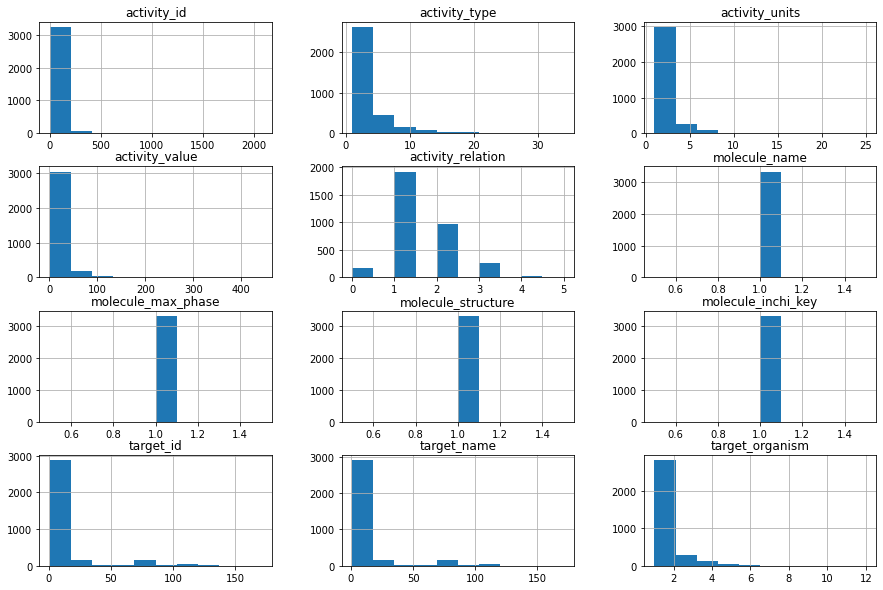

In [10]:
df2.hist(bins=10, figsize=(15, 10))

In [11]:
df.columns

Index(['activity_id', 'activity_type', 'activity_units', 'activity_value',
       'activity_relation', 'molecule_name', 'molecule_max_phase',
       'molecule_structure', 'molecule_inchi_key', 'target_id', 'target_name',
       'target_organism'],
      dtype='object')

In [12]:
df.head(10).to_dict('records')

[{'activity_id': 804532,
  'activity_type': 'Ki',
  'activity_units': 'nM',
  'activity_value': 0.55,
  'activity_relation': '=',
  'molecule_name': 'PRAZOSIN',
  'molecule_max_phase': 4,
  'molecule_structure': 'COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC',
  'molecule_inchi_key': 'IENZQIKPVFGBNW-UHFFFAOYSA-N',
  'target_id': 128,
  'target_name': 'Alpha-1b adrenergic receptor',
  'target_organism': 'Homo sapiens'},
 {'activity_id': 990231,
  'activity_type': 'Ki',
  'activity_units': 'nM',
  'activity_value': 0.28,
  'activity_relation': '=',
  'molecule_name': 'PRAZOSIN',
  'molecule_max_phase': 4,
  'molecule_structure': 'COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC',
  'molecule_inchi_key': 'IENZQIKPVFGBNW-UHFFFAOYSA-N',
  'target_id': 128,
  'target_name': 'Alpha-1b adrenergic receptor',
  'target_organism': 'Homo sapiens'},
 {'activity_id': 1011682,
  'activity_type': 'Ki',
  'activity_units': 'nM',
  'activity_value': 0.55,
  'activity_relation': '=',
  'molecule_name': 'PRA